![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos Á. Iglesias

## [Introduction to Machine Learning V](2_6_0_Intro_RL.ipynb)

## Visualization


In this section we are going to visualize Q-Learning based on this [link](https://gymnasium.farama.org/tutorials/training_agents/FrozenLake_tuto/#sphx-glr-tutorials-training-agents-frozenlake-tuto-py). The code has been ported to the last version of Gymnasium.

First, we are going to define a class *Params* for the Q-Learning parameters and the environment based on these values.

In [1]:
from qlearning import *
sns.set_theme()

In [2]:
params = Params(
    total_episodes=2000,
    learning_rate=0.8,
    gamma=0.95,
    epsilon=0.1,
    map_size=5,
    seed=123,
    is_slippery=False,
    n_runs=20,
    action_size=None,
    state_size=None,
    proba_frozen=0.9,
    savefig_folder=Path("./"),
)
params

# Set the seed
rng = np.random.default_rng(params.seed)

# Create the figure folder if it doesn't exists
params.savefig_folder.mkdir(parents=True, exist_ok=True)

#  Environment
env = gym.make(
    "FrozenLake-v1",
    is_slippery=params.is_slippery,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=params.map_size, p=params.proba_frozen, seed=params.seed
    ),
)


The Q-Learning algorithm has been defined with two clases in the file *qlearning.py*:
- *Qlearning* for learning the q-table
- *EpsilonGreedy* for implementing the epsilon-greedy policy 

First, we check the environment.

In [3]:
params = params._replace(action_size=env.action_space.n)
params = params._replace(state_size=env.observation_space.n)
print(f"Action size: {params.action_size}")
print(f"State size: {params.state_size}")

Action size: 4
State size: 25


## Running the environment

In [4]:
learner = Qlearning(
    learning_rate=params.learning_rate,
    gamma=params.gamma,
    state_size=params.state_size,
    action_size=params.action_size,
)
explorer = EpsilonGreedy(
    epsilon=params.epsilon,
    rng = rng
)

This will be our main function to run our environment until the maximum number of episodes *params.total_episodes*. To account for stochasticity, we will also run our environment a few times.

We want to plot the policy the agent has learned in the end. To do that the function *qtable_directions_map* perform these actions: 1. extract the best Q-values from the Q-table for each state, 2. get the corresponding best action for those Q-values, 3. map each action to an arrow so we can visualize it.

The function *plot_q_values_map* plots on the left the last frame of the simulation. If the agent learned a good policy to solve the task, we expect to see it on the tile of the treasure in the last frame of the video. On the right we’ll plot the policy the agent has learned. Each arrow will represent the best action to choose for each tile/state.

As a sanity check, the function *plot_states_actons_distribution* plots the distributions of states and actions.

Now we’ll be running our agent on a few increasing maps sizes: 
- 4x4
- 7x7
- 9x9
- 11x11

Putting it all together:

In [5]:
params

Params(total_episodes=2000, learning_rate=0.8, gamma=0.95, epsilon=0.1, map_size=5, seed=123, is_slippery=False, n_runs=20, action_size=4, state_size=25, proba_frozen=0.9, savefig_folder=PosixPath('.'))

Map size: 11x11


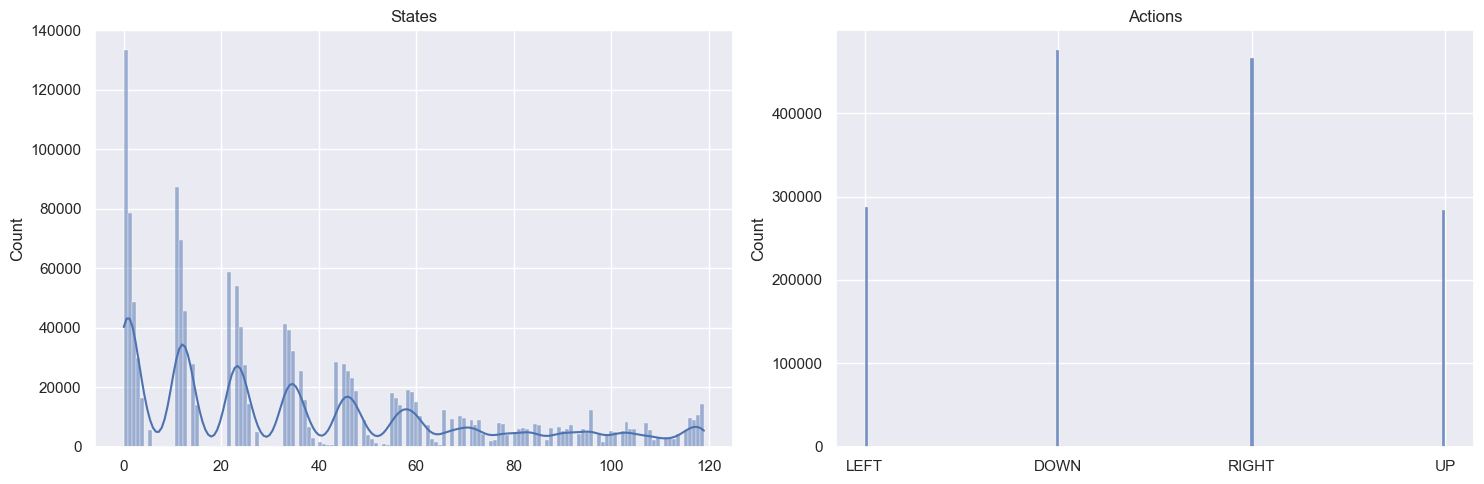

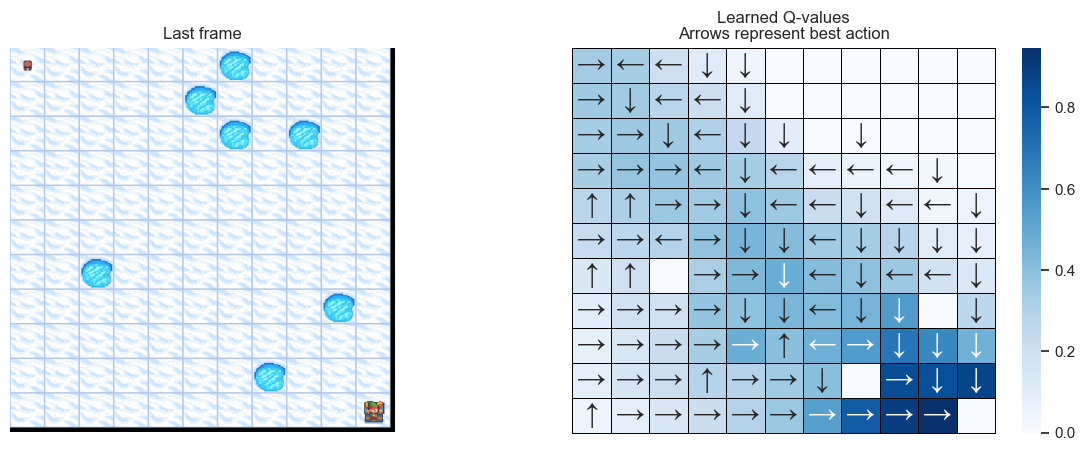

In [6]:
map_sizes = [4, 7, 9, 11]


res_all, st_all = run_frozen_maps(map_sizes, params, rng)

The DOWN and RIGHT actions get chosen more often, which makes sense as the agent starts at the top left of the map and needs to find its way down to the bottom right. Also the bigger the map, the less states/tiles further away from the starting state get visited.

To check if our agent is learning, we want to plot the cumulated sum of rewards, as well as the number of steps needed until the end of the episode. If our agent is learning, we expect to see the cumulated sum of rewards to increase and the number of steps to solve the task to decrease. 

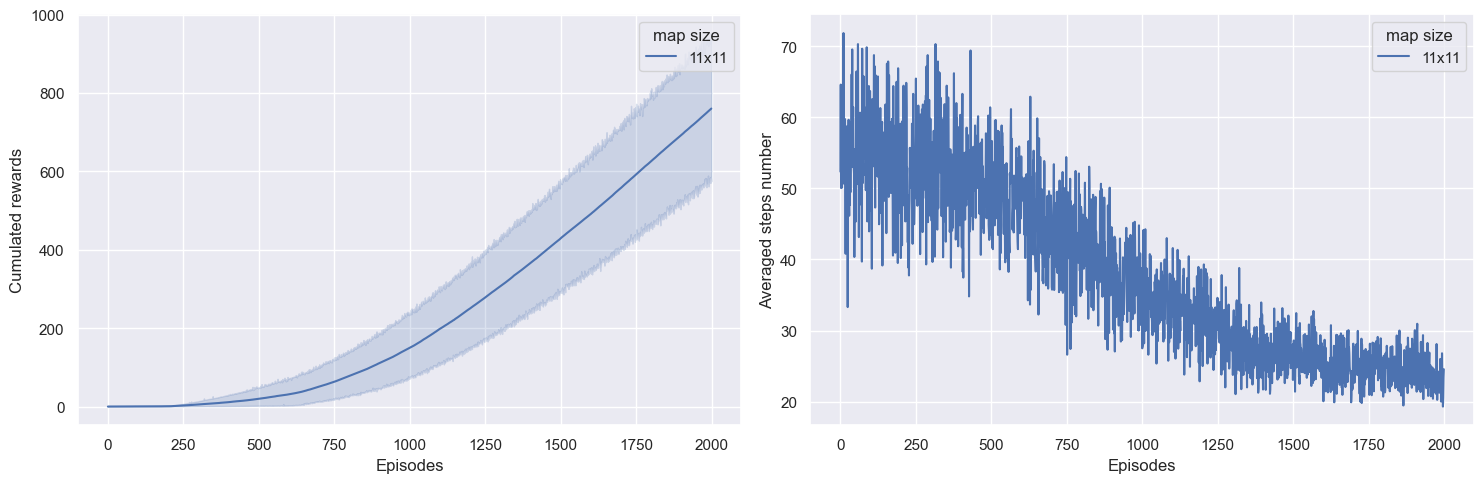

In [7]:
plot_steps_and_rewards(res_all, st_all,params)

## References
* [Gymnasium documentation](https://gymnasium.farama.org/).
* [Diving deeper into Reinforcement Learning with Q-Learning, Thomas Simonini](https://medium.freecodecamp.org/diving-deeper-into-reinforcement-learning-with-q-learning-c18d0db58efe).
* Illustrations by [Thomas Simonini](https://github.com/simoninithomas/Deep_reinforcement_learning_Course) and [Sung Kim](https://www.youtube.com/watch?v=xgoO54qN4lY).
* [Frozen Lake solution with TensorFlow](https://analyticsindiamag.com/openai-gym-frozen-lake-beginners-guide-reinforcement-learning/)
* [Deep Q-Learning for Doom](https://medium.freecodecamp.org/an-introduction-to-deep-q-learning-lets-play-doom-54d02d8017d8)
* [Intro OpenAI Gym with Random Search and the Cart Pole scenario](http://www.pinchofintelligence.com/getting-started-openai-gym/)
* [Q-Learning for the Taxi scenario](https://www.oreilly.com/learning/introduction-to-reinforcement-learning-and-openai-gym)

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos Á. Iglesias, Universidad Politécnica de Madrid.